[*********************100%***********************]  25 of 25 completed


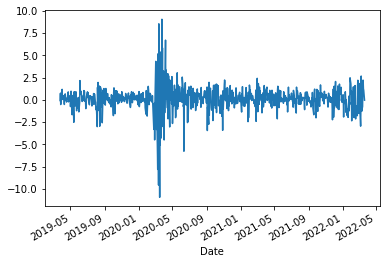

In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import date
from arch import arch_model


d=date.today()


dfSectors = pd.read_excel(r"C:\Users\samla\PycharmProjects\DeepOcean\World_Universe.xlsx", engine='openpyxl')

tickers_list = dfSectors["Symbol"].values.tolist()

total_hist = yf.download(tickers=tickers_list, period="3y",
                        interval="1d", group_by='ticker',
                        auto_adjust=True, prepost=True,
                        threads=True, proxy=None)

ticker = total_hist['SPY']
returns = 100 * ticker['Close'].pct_change().dropna()
returns.plot()
plt.show()

In [2]:
model=arch_model(returns, vol='Garch', p=1, o=0, q=1, dist='Normal')
results=model.fit()
print(results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3942.7103080519673
Iteration:      2,   Func. Count:     16,   Neg. LLF: 13813031308.845966
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1333.3973158732988
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1049.2215232183426
Iteration:      5,   Func. Count:     36,   Neg. LLF: 1885.484609050043
Iteration:      6,   Func. Count:     42,   Neg. LLF: 1048.7257116990518
Iteration:      7,   Func. Count:     47,   Neg. LLF: 1048.7256263779113
Iteration:      8,   Func. Count:     52,   Neg. LLF: 1048.7256258016962
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1048.7256258016962
            Iterations: 8
            Function evaluations: 52
            Gradient evaluations: 8
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squa

C:\Users\samla\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


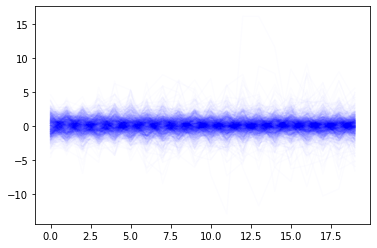

In [3]:
forecasts = results.forecast(horizon=20, method='simulation', simulations=1000)
sims = forecasts.simulations

lines = plt.plot(sims.values[-1,:,:].T, color='blue', alpha=0.01)
lines[0].set_label('Simulated paths')
plt.show()

-2.0582742335370767


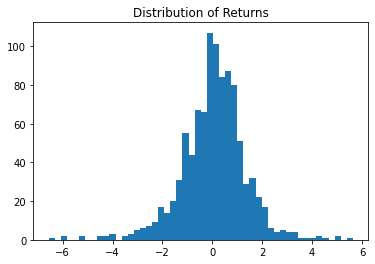

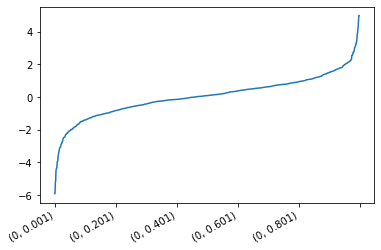

In [4]:
print(np.percentile(sims.values[-1,:,-1].T,5))
plt.hist(sims.values[-1, :,-1],bins=50)
plt.title('Distribution of Returns')
plt.show()

my_sims_df = pd.DataFrame(sims.values[-1, :,-1])

arr = np.arange(start=0.001, stop=1, step=0.001)

i = my_sims_df.quantile(arr).unstack()

i.T.plot(subplots=True)
plt.show()

we are expecting a loss of about 273.66% or greater with 5% probability.

In [ ]:
# modeling a random price walk over 100 days
# -- conduct calculation, define function
def randomWalk(stdev,pastPrices):
    days = [i for i in range(1,101)]
    prices = []
    price = pastPrices[-1]
    for i in range(1,101):
        price = price + price*rnd.normalvariate(0,stdev)
        prices.append(price)
    return([days,prices])
# -- conduct calculation, use function
prices = randomWalk(std_prices,history_prices)
# -- visualize random walk in a line plot
plt.plot(prices[0],prices[1])
plt.title("random price walk")
plt.xlabel("day")
plt.ylabel("stock price")

